In [45]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate more linear data
weights = np.random.uniform(45, 75, 200)
heights = 100 + 1.5 * weights + np.random.normal(0, 5, 200)

df = pd.DataFrame({'Weight': weights, 'Height': heights})

# Round the values to integers
df['Weight'] = df['Weight'].astype(int)
df['Height'] = df['Height'].astype(int)

print(df.head())


   Weight  Height
0      56     180
1      73     211
2      66     201
3      62     190
4      49     183


In [46]:
df

,Weight,Height
0,56,180
1,73,211
2,66,201
3,62,190
4,49,183
...,...,...
195,55,176
196,66,196
197,71,206
198,71,208


Text(0, 0.5, 'Height')

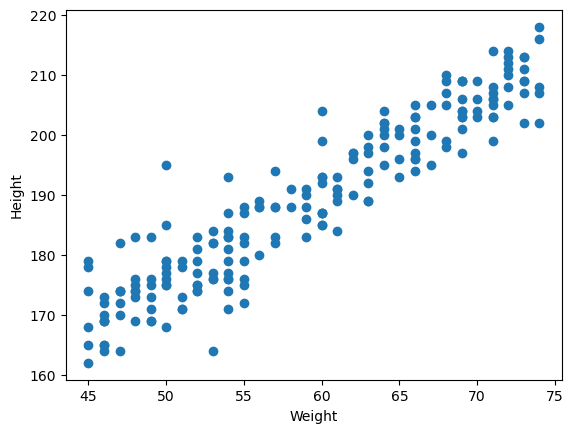

In [47]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [48]:
df.corr()

,Weight,Height
Weight,1.000000,0.937891
Height,0.937891,1.000000


c:\Users\Jayraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jayraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


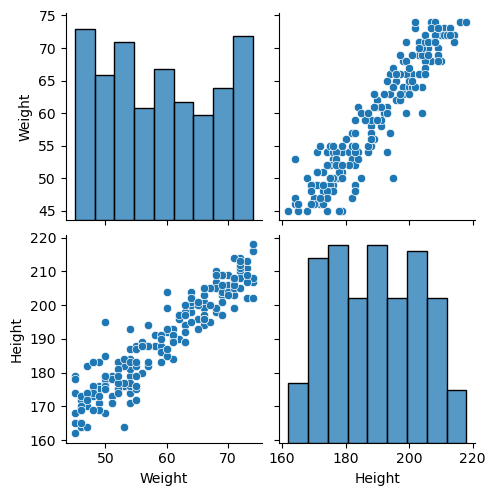

In [49]:
import seaborn as sns
sns.pairplot(df)

In [50]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d arra

In [51]:
X_series=df['Weight']
np.array(X_series).shape

(200,)

In [52]:
np.array(y).shape

(200,)

In [53]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
from sklearn.preprocessing  import StandardScaler  
scaler = StandardScaler()

In [55]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_test= scaler.transform(X_test)

In [57]:
X_train 

array([[ 0.55595114],
       [-0.90905525],
       [-1.13444085],
       [ 1.11941514],
       [-1.02174805],
       [ 1.11941514],
       [ 1.57018634],
       [-1.58521204],
       [ 0.10517995],
       [ 0.10517995],
       [ 0.33056554],
       [-0.23289845],
       [-1.02174805],
       [ 1.11941514],
       [ 1.11941514],
       [ 0.21787275],
       [-1.47251924],
       [-0.79636245],
       [-1.24713364],
       [ 0.10517995],
       [ 1.00672234],
       [ 1.23210794],
       [ 0.55595114],
       [-0.00751285],
       [ 1.34480074],
       [ 1.11941514],
       [-1.02174805],
       [ 1.68287913],
       [-1.58521204],
       [-1.13444085],
       [ 0.78133674],
       [-1.35982644],
       [-0.57097685],
       [ 0.21787275],
       [ 1.34480074],
       [-0.57097685],
       [ 0.44325834],
       [-0.57097685],
       [-1.35982644],
       [-0.68366965],
       [-0.68366965],
       [-0.79636245],
       [ 0.55595114],
       [ 1.57018634],
       [ 1.68287913],
       [-0

In [59]:
X_test

array([[-0.00751285],
       [-1.02174805],
       [ 0.44325834],
       [-0.79636245],
       [-1.58521204],
       [ 1.34480074],
       [ 1.68287913],
       [ 0.66864394],
       [ 0.55595114],
       [ 0.55595114],
       [-1.13444085],
       [ 1.45749354],
       [ 1.23210794],
       [-0.45828405],
       [ 1.11941514],
       [-0.34559125],
       [-1.35982644],
       [-1.13444085],
       [-0.57097685],
       [-1.35982644],
       [-0.90905525],
       [-0.57097685],
       [-1.47251924],
       [ 0.21787275],
       [ 0.21787275],
       [-0.34559125],
       [-0.57097685],
       [ 1.11941514],
       [-0.23289845],
       [-1.24713364],
       [ 0.78133674],
       [-0.23289845],
       [ 1.45749354],
       [ 0.78133674],
       [ 1.45749354],
       [ 1.45749354],
       [-0.57097685],
       [ 0.78133674],
       [-1.35982644],
       [ 1.00672234],
       [-1.24713364],
       [ 1.34480074],
       [ 0.66864394],
       [-0.12020565],
       [-0.57097685],
       [-0

In [60]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression 
regression=LinearRegression()

In [61]:
from sklearn.model_selection import cross_val_score

In [63]:
mae = cross_val_score(regression , X_train , y_train , scoring='neg_mean_squared_error' , cv=10) 

In [64]:
np.mean(mae)

-23.430435089739944

In [65]:
# regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [66]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [13.37212755]
Intercept: 189.4


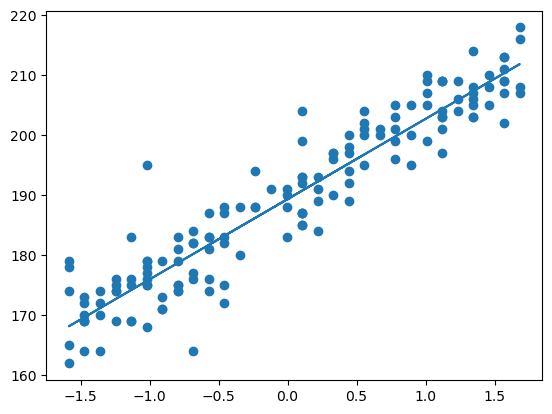

In [67]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [68]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [69]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

25.79641569048275
4.162406728001357
5.079017197301339


In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test , y_pred)   # too mauch low acccuracy 

0.8525096528664973